 # Health Network Graph, General Version

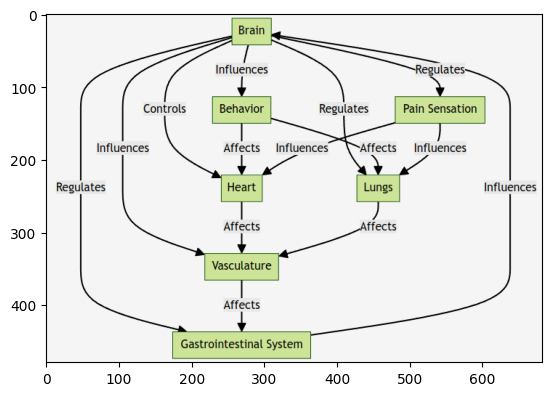

In [1]:
import matplotlib.pyplot as plt
import os
img = plt.imread('/home/robertc/Git/pfun-cma-model/examples/diagrams/health-network-graph-general.png')
plt.imshow(img)

# Health Network Graph (Specifics, given a specific dataset)

## CGM Data (input)

In [2]:
import pandas as pd
df = pd.read_csv('/home/robertc/Git/pfun-cma-model/examples/data/valid_data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,user_id,ts_utc,ts_local,is_sg,sg,is_fl,meal_tag,tag_bef_meal,tag_after_meal,tag_after_snack,tag_seems_high,tag_seems_low
0,0,0,10130489,2021-01-18 09:48:09,2021-01-18 01:48:09,1,112.0,0,NaN,True,False,False,False,False
1,1,1,10130489,2021-01-18 09:53:08,2021-01-18 01:53:08,1,102.0,0,NaN,True,False,False,False,True
2,2,2,10130489,2021-01-18 09:58:08,2021-01-18 01:58:08,1,99.0,0,NaN,True,False,False,False,True
3,3,3,10130489,2021-01-18 10:03:09,2021-01-18 02:03:09,1,101.0,0,NaN,True,False,False,False,True
4,4,4,10130489,2021-01-18 10:08:08,2021-01-18 02:08:08,1,102.0,0,NaN,True,False,False,False,True


## Instantiate Model

In [3]:
from pfun_cma_model.runtime.chalicelib.engine.fit import fit_model

result = fit_model(df[['ts_local', 'ts_utc', 'sg']])
result.soln.head()

,t,c,m,a,I_S,I_E,L,g_0,g_1,g_2,g_3,G,is_meal
0 days 00:05:50.499999999,0.097361,0.266419,0.561871,0.256704,0.393708,0.101066,0.139298,0.257636,0.257636,0.257636,0.257636,1.030543,False
0 days 00:08:12.000000001,0.136667,0.273462,0.555058,0.256880,0.398698,0.102418,0.143862,0.257636,0.257636,0.257636,0.257636,1.030543,False
0 days 00:08:17.999999998,0.138333,0.273764,0.554765,0.256888,0.398912,0.102476,0.144057,0.257636,0.257636,0.257636,0.257636,1.030543,False
0 days 00:10:54.500000001,0.181806,0.281734,0.547024,0.257090,0.404588,0.104015,0.149213,0.257636,0.257636,0.257636,0.257636,1.030543,False
0 days 00:13:12,0.220000,0.288875,0.540058,0.257273,0.409702,0.105405,0.153833,0.257636,0.257636,0.257636,0.257636,1.030543,False


## View Fitted Model Parameters

In [4]:
result.popt_named

{'d': -0.2144893802803634,
 'taup': 3.0,
 'taug': 1.0970943777256237,
 'B': 0.12881791997462208,
 'Cm': 0.0,
 'toff': 0.0}